In [10]:
from PIL import Image, ImageDraw
from matplotlib import cm
import pandas as pd


In [2]:
outpath = "output/join_images/"

In [3]:
def get_concat_v(images):
    space = 0
    height = images[0].size[1]
    dst = Image.new('RGB', (images[0].width, height*len(images) + space*(len(images) - 1)))
#     width, height = dst.size
#     pixdata = dst.load()
#     for y in range(height):
#         for x in range(width):
#             if pixdata[x, y] == (255, 255, 255, 255):
#                 pixdata[x, y] = (255, 255, 255, 0)
    for i in range(len(images)):
      
      dst.paste(images[i], (0, height*i + space*i))

    return dst

In [18]:
# datanames = ["V1_Mouse_Brain_Sagittal_Anterior","V1_Mouse_Brain_Sagittal_Posterior","V1_Mouse_Kidney"]
datanames = ["p20218_s004_L4","p20218_s003_L3","p20218_s002_L2","p20218_s001_L1","p20190_s004_4_BrainMetastasis",
            "p20190_s003_3_BrainMetastasis"]
# window = "chr9_13405_minus"
# low = 67020000
# high = 67025000
windows = ['chr11_12393_minus',
 'chr11_13025_minus',
 'chr11_22382_minus',
 'chr12_10972_plus',
 'chr16_11322_plus',
 'chr16_393_minus',
 'chr1_127_plus',
 'chr1_30673_plus',
 'chr1_30707_minus',
 'chrM_1_plus',
 'chrM_2_plus',
 'chrM_3_plus']
windows = ["chr6_6373_plus"]
label = "human_tumor"
annotation_file = "/oak/stanford/groups/horence/JuliaO/nf-readzs/visium/p20190_s003_3_BrainMetastasis/annotated_files/annotated_windows.file"
ann_df = pd.read_csv(annotation_file,sep="\t")
for window in windows:


  low = int(ann_df[ann_df["window"] == window]["start"])
  high = int(ann_df[ann_df["window"] == window]["end"])
  # window = "chr11_10983_plus"
  # low = 54910000
  # high = 54910625

  # window = "chr4_23431_minus"
  # low = 117150000
  # high = 117155000 

  # window = "chrX_14365_plus"
  # low = 71820000
  # high = 71825000

  # window = "chr5_28581_minus"
  # low = 142900000
  # high = 142905000

  # window = "chr11_20117_minus"
  # low = 100580000
  # high = 100585000

  # window = "chr1_34440_minus"
  # low = 172195000
  # high = 172200000

  # window = "chr7_28286_minus"
  # low = 141425000
  # high = 141430000

  # window = "chr17_16275_minus"
  # low = 81370000
  # high = 81375000

  # window = "chr8_11013_plus"
  # low = 55060000
  # high = 55061250  

  images = []
  for dataname in datanames:
  # dataname = "V1_Mouse_Kidney"
  # dataname = "V1_Mouse_Brain_Sagittal_Anterior"
  # window = "chr11_10983_plus"
  # low = 54910000
  # high = 54910625

      try:
        img1 = Image.open('../scripts/output/plot_gene_val/{}_{}_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'.format(dataname, window))
        # img1.show()
        w1, h1 = img1.size
        # img1 = img1.crop((0, 250, w1, h1))
        img1 = img1.crop((0, 49, w1, h1))
        # img1.show()

        img2 = Image.open('../scripts/output/peak_plot/{}_{}_peak_range_{}_{}.png'.format(dataname,window,low,high))

        # img2.show()
        w2, h2 = img2.size
        # img2 = img2.crop((75, 0, w2, h2 - 100))
        img2 = img2.crop((75, 0, w2, h2 - 50))
        # img2.show()

        w1, h1 = img1.size
        w2, h2 = img2.size

        w = w1 + w2
        h = h1

        hpercent = (h/float(img2.size[1]))
        wsize = int((float(img2.size[0])*float(hpercent)))
        img2 = img2.resize((wsize,h1))

        new_image = Image.new('RGB', (w1+wsize, h))

        # put images on new_image
        new_image.paste(img1, (0, 0))
        new_image.paste(img2, (w1, 0))
        # new_image.paste(img3, (0, h))
        # new_image.paste(img4, (w, h))


        img1 = ImageDraw.Draw(new_image)  
        cmap = cm.get_cmap('viridis')

        colors = ["yellow","lawngreen","teal","rebeccapurple"]
        heightFrac = 1
        width = 10
        hf = h*heightFrac
        for i in range(4):
          shape = [(w1 - width, i*hf/4), (w1 + width, (i+1)*hf/4)]
          img1.rectangle(shape, fill =colors[i], outline ="black",width=2)
        new_image.save("{}{}_{}.png".format(outpath,window,dataname),dpi=(500,500))
        images.append(new_image)
        new_image.show()
      except Exception as e:
        print(e)
  img = get_concat_v(images)
  img.show()
  img.save("{}{}_{}.png".format(outpath,label,window),dpi=(500,500))


[Errno 2] No such file or directory: '../scripts/output/plot_gene_val/p20218_s004_L4_chr6_6373_plus_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'
[Errno 2] No such file or directory: '../scripts/output/plot_gene_val/p20218_s003_L3_chr6_6373_plus_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'
[Errno 2] No such file or directory: '../scripts/output/plot_gene_val/p20218_s002_L2_chr6_6373_plus_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'
[Errno 2] No such file or directory: '../scripts/output/plot_gene_val/p20218_s001_L1_chr6_6373_plus_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'
[Errno 2] No such file or directory: '../scripts/output/plot_gene_val/p20190_s004_4_BrainMetastasis_chr6_6373_plus_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'
[Errno 2] No such file or directory: '../scripts/output/plot_gene_val/p20190_s003_3_BrainMetastasis_chr6_6373_plus_ReadZS_norm_ReadZS_ge_normb0_quant_15.png'


IndexError: list index out of range

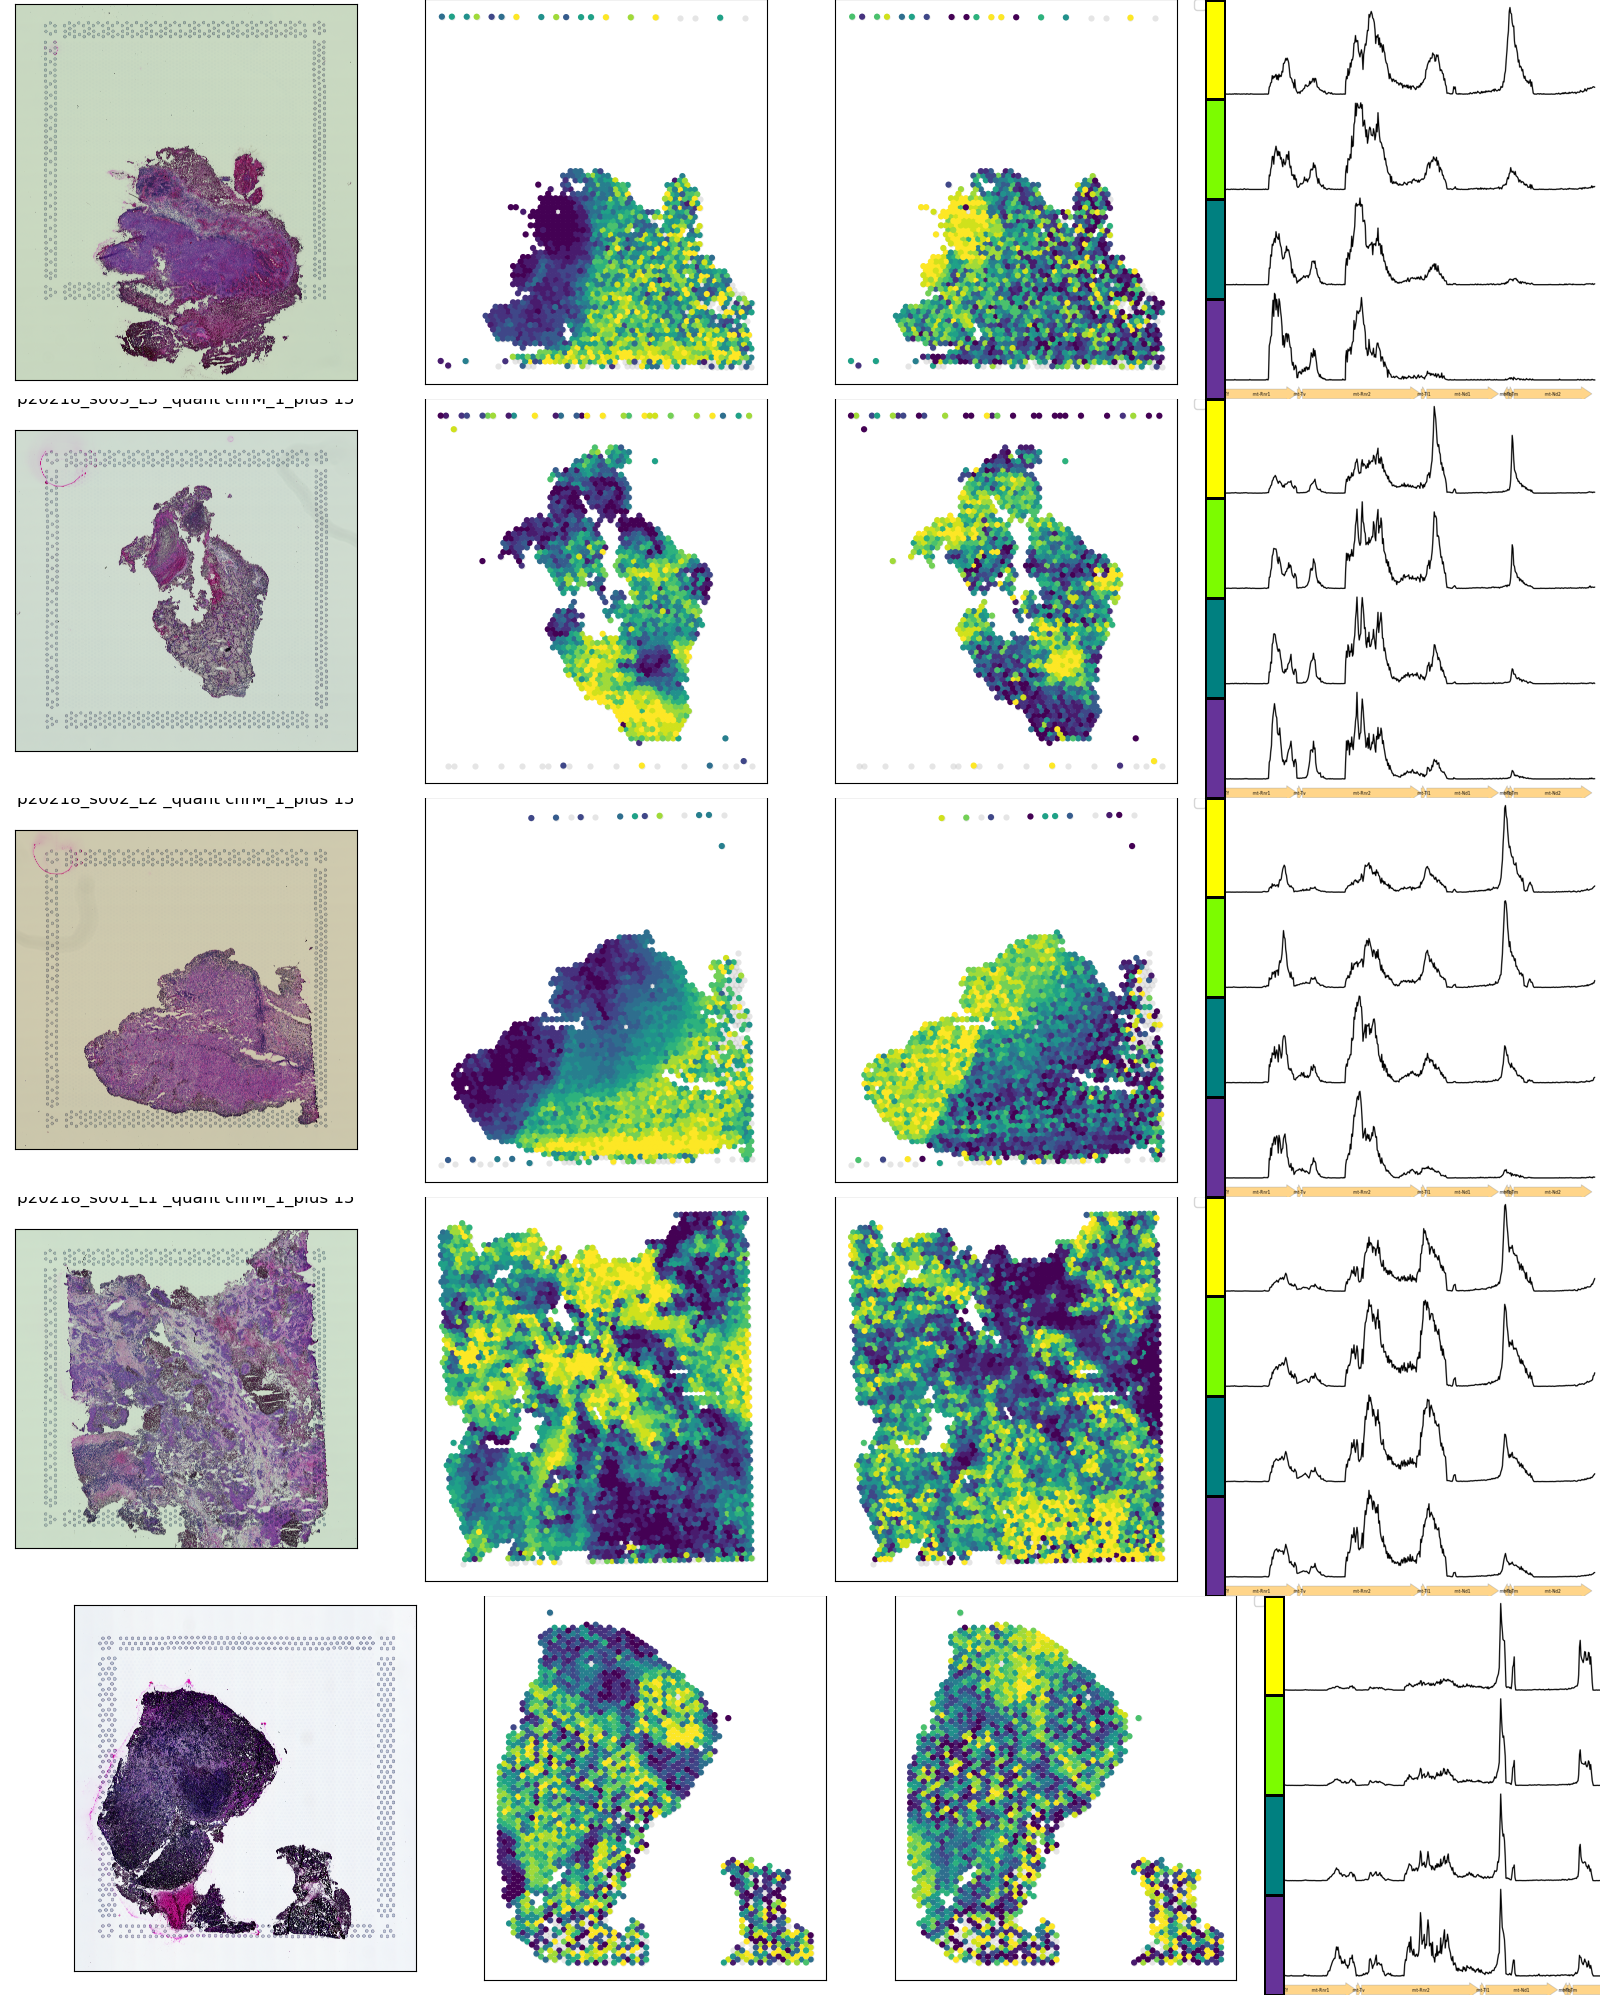

In [7]:
img = get_concat_v(images)
img.show()
img.save("{}{}_{}.png".format(outpath,label,window),dpi=(500,500))


In [8]:
images[0].size

(1600, 399)

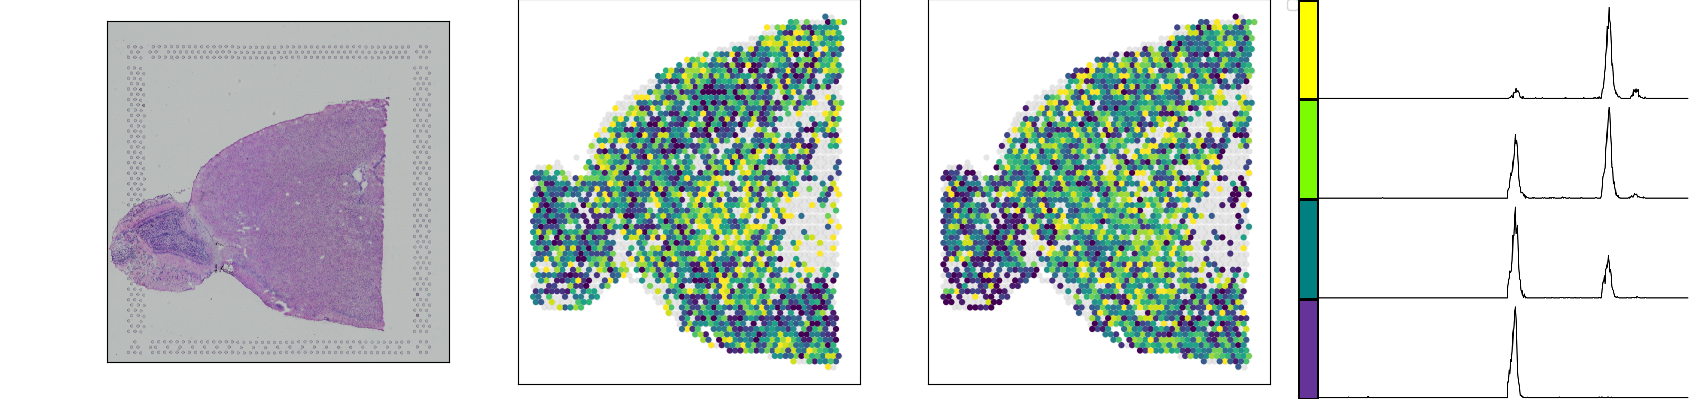